# LOGISTIC REGRESSION ASSIGNMENT | Car Acceptability Classification

## Introduction of the Dataset

The Car Acceptability Classification Dataset consists of 1,728 entries with 7 categorical columns: Buying_Price, Maintenance_Price, No_of_Doors, Person_Capacity, Size_of_Luggage, Safety, and Car_Acceptability. Each feature represents different attributes related to car features and their acceptability, with Car_Acceptability serving as the target variable for classification.

- Dataset Size: 1,728 entries with 7 features.
- Features: All columns are categorical, including Buying_Price, Maintenance_Price, No_of_Doors, Person_Capacity, Size_of_Luggage, and Safety.
- Target Variable: Car_Acceptability, which indicates the acceptability of the car.
- Data Type: All columns are of object type, requiring encoding for modeling.

## Import Libraries

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the dataset

In [81]:
df = pd.read_csv(r"C:\Ozy\Data Science\DS datasets\car.csv")
df.head()

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Basic Information of dataset

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Buying_Price       1728 non-null   object
 1   Maintenance_Price  1728 non-null   object
 2   No_of_Doors        1728 non-null   object
 3   Person_Capacity    1728 non-null   object
 4   Size_of_Luggage    1728 non-null   object
 5   Safety             1728 non-null   object
 6   Car_Acceptability  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


## Summary of the dataset

In [83]:
df.describe()

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


## Checking Missing values in DataFrame

In [84]:
df.isnull().sum()

Buying_Price         0
Maintenance_Price    0
No_of_Doors          0
Person_Capacity      0
Size_of_Luggage      0
Safety               0
Car_Acceptability    0
dtype: int64

## Visualizations

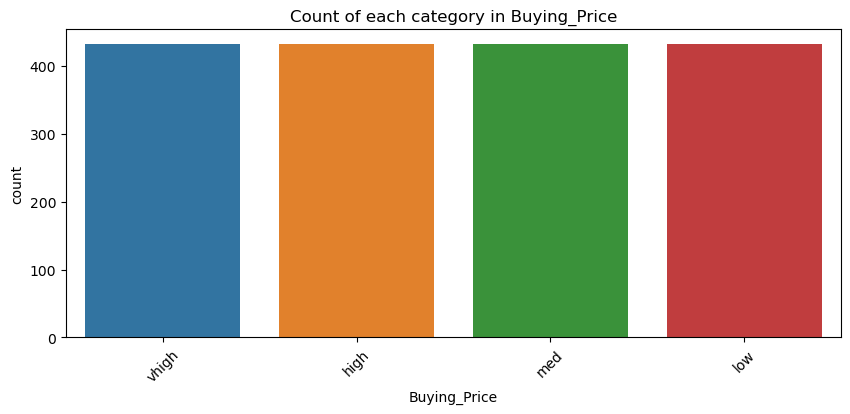

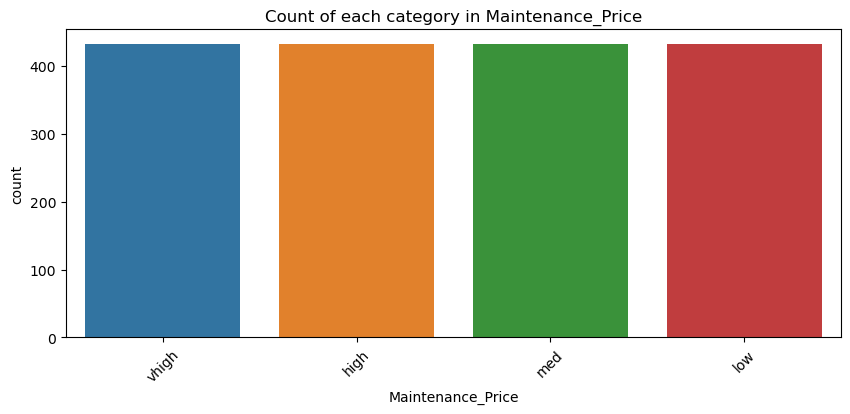

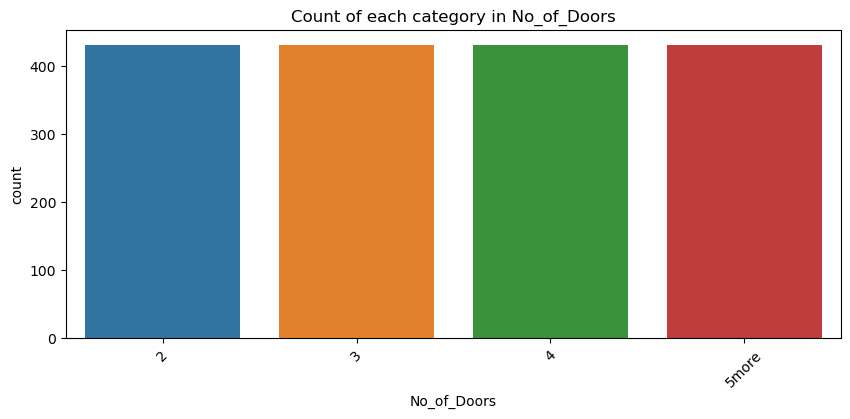

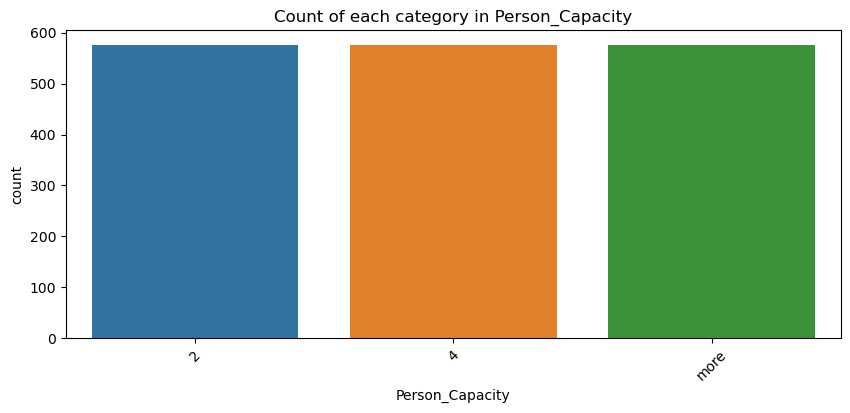

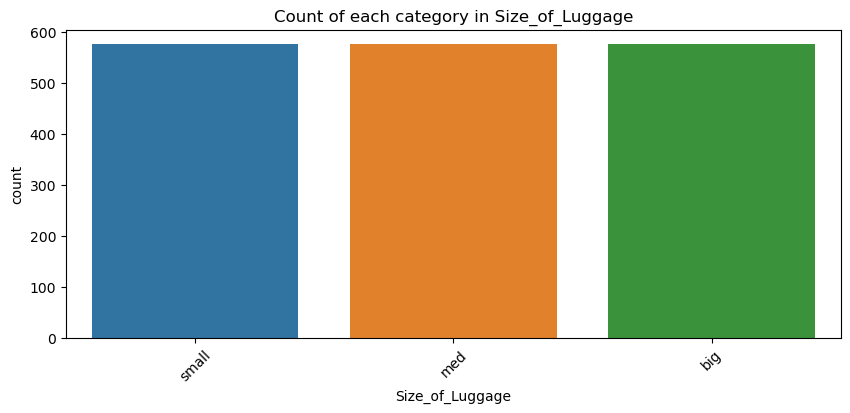

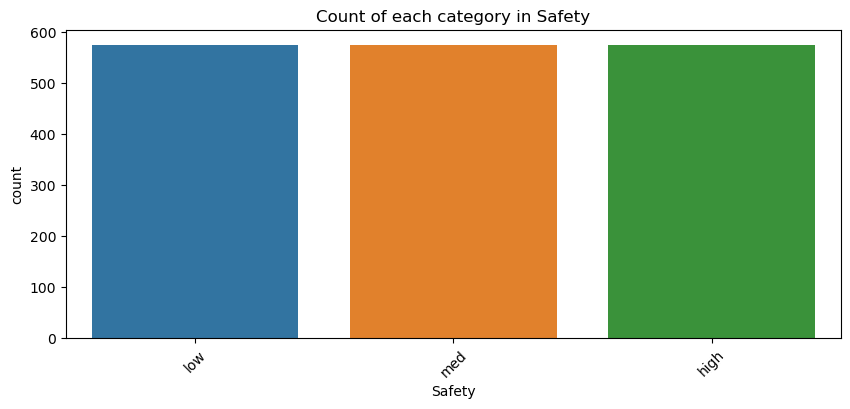

In [85]:
# Plot Bar Plot

for column in df.columns[:-1]:  # Exclude the target variable for now
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=column)
    plt.title(f'Count of each category in {column}')
    plt.xticks(rotation=45)
    plt.show()

- Bar Plots: Visualize the frequency of each category within each feature.

## Encode Categorical Variables

In [86]:
# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Ensure all boolean columns are converted to integers (0 and 1)
df = df.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)
df.head()

,Buying_Price_low,Buying_Price_med,Buying_Price_vhigh,Maintenance_Price_low,Maintenance_Price_med,Maintenance_Price_vhigh,No_of_Doors_3,No_of_Doors_4,No_of_Doors_5more,Person_Capacity_4,Person_Capacity_more,Size_of_Luggage_med,Size_of_Luggage_small,Safety_low,Safety_med,Car_Acceptability_good,Car_Acceptability_unacc,Car_Acceptability_vgood
0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0
1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0
2,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0
4,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0


## Identify and Transform Target Variable

In [87]:
# Create a single column target variable by identifying the column with value 1
y = df[['Car_Acceptability_good', 'Car_Acceptability_unacc', 'Car_Acceptability_vgood']].idxmax(axis=1)

# Map the target variable to integer labels
y = y.map({
    'Car_Acceptability_good': 0,
    'Car_Acceptability_unacc': 1,
    'Car_Acceptability_vgood': 2
})

# Drop the target columns from the features
X = df.drop(['Car_Acceptability_good', 'Car_Acceptability_unacc', 'Car_Acceptability_vgood'], axis=1)

# Ensure all categorical variables are encoded if not already done
X = pd.get_dummies(X, drop_first=True)

# Verify the features
X.head()

,Buying_Price_low,Buying_Price_med,Buying_Price_vhigh,Maintenance_Price_low,Maintenance_Price_med,Maintenance_Price_vhigh,No_of_Doors_3,No_of_Doors_4,No_of_Doors_5more,Person_Capacity_4,Person_Capacity_more,Size_of_Luggage_med,Size_of_Luggage_small,Safety_low,Safety_med
0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0
1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1
2,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
4,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1


In [88]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1723    0
1724    2
1725    1
1726    0
1727    2
Length: 1728, dtype: int64

## Splitting the Dataset

In [89]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (1209, 15) (1209,)
Testing set shape: (519, 15) (519,)


## Implement Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model for multi-class classification
log_reg = LogisticRegression(C=1, solver='liblinear', max_iter=1000, multi_class='ovr')

- LogisticRegression model. By default, multi_class='auto' which is typically set to 'ovr' when the number of classes is more than two.
- Solver: The solver determines the algorithm used for optimization. liblinear is a good choice for smaller datasets, while saga is suitable for larger datasets and supports L1 and L2 regularization.

# Train the model on the Training Data

In [91]:
log_reg.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=1, max_iter=1000, multi_class='ovr', solver='liblinear')

## Make predictions on the Test Data

In [92]:
y_pred = log_reg.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,

## Calculate Evaluation Metrics

In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test), multi_class='ovr')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

Accuracy: 0.90
Precision: 0.86
Recall: 0.90
F1-Score: 0.88
ROC-AUC Score: 0.99


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Confusion Matrix

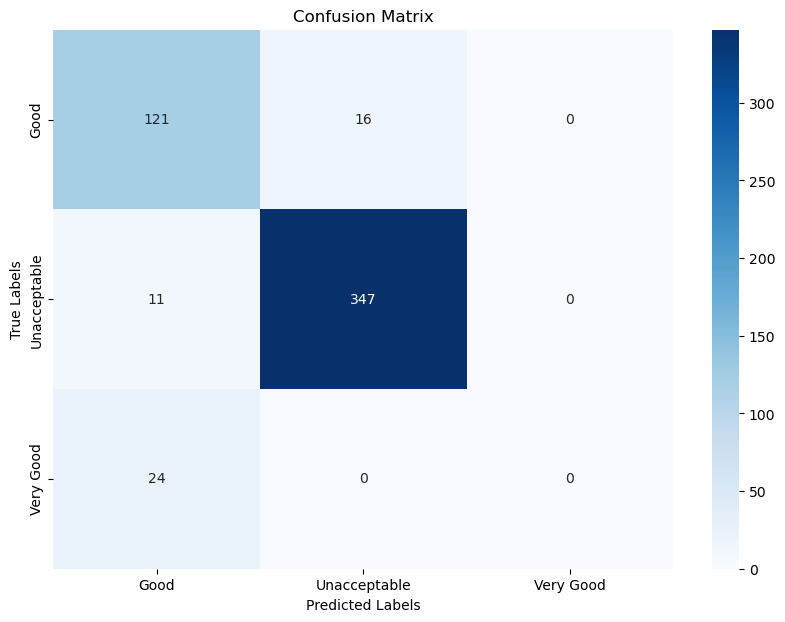

In [94]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Good', 'Unacceptable', 'Very Good'], yticklabels=['Good', 'Unacceptable', 'Very Good'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

- The confusion matrix visualizes the performance of the classification model by showing the number of true positives, true negatives, false positives, and false negatives. It provides insights into the types of errors made by the model.

## Classification Report

In [95]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       137
           1       0.96      0.97      0.96       358
           2       0.00      0.00      0.00        24

    accuracy                           0.90       519
   macro avg       0.58      0.62      0.60       519
weighted avg       0.86      0.90      0.88       519



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


- The classification report summarizes key performance metrics such as precision, recall, and F1-score for each class, offering a detailed view of the model's accuracy and effectiveness in classifying each class

## Plot the ROC Curve

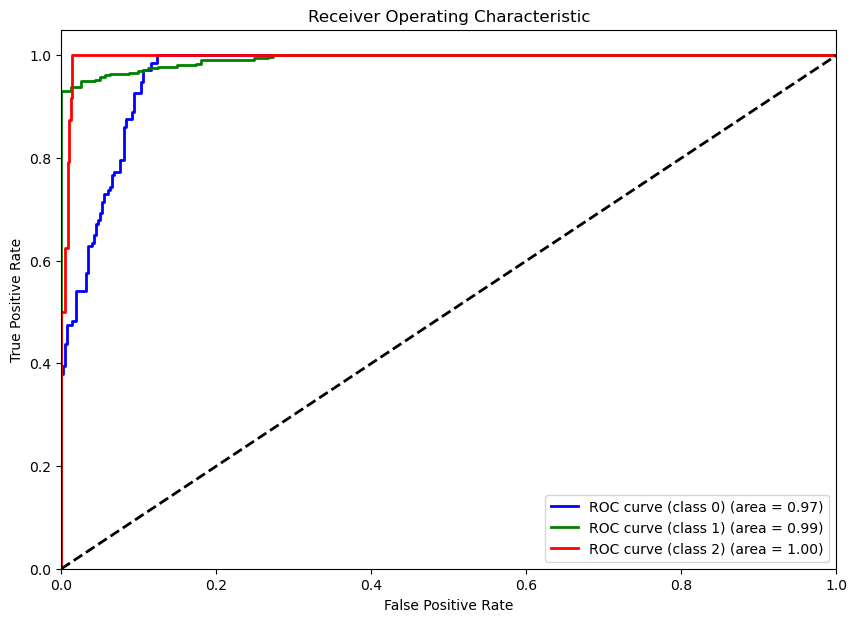

In [96]:
# Compute ROC Curve
fpr = {}
tpr = {}
roc_auc = {}

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])

# Plot ROC Curve
plt.figure(figsize=(10, 7))
colors = ['blue', 'green', 'red']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (class {i}) (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


- The ROC curve plots the true positive rate against the false positive rate for different threshold values, illustrating the model's ability to discriminate between classes. The area under the ROC curve (AUC) represents the overall performance of the model.

## Visualizing Model Coefficients

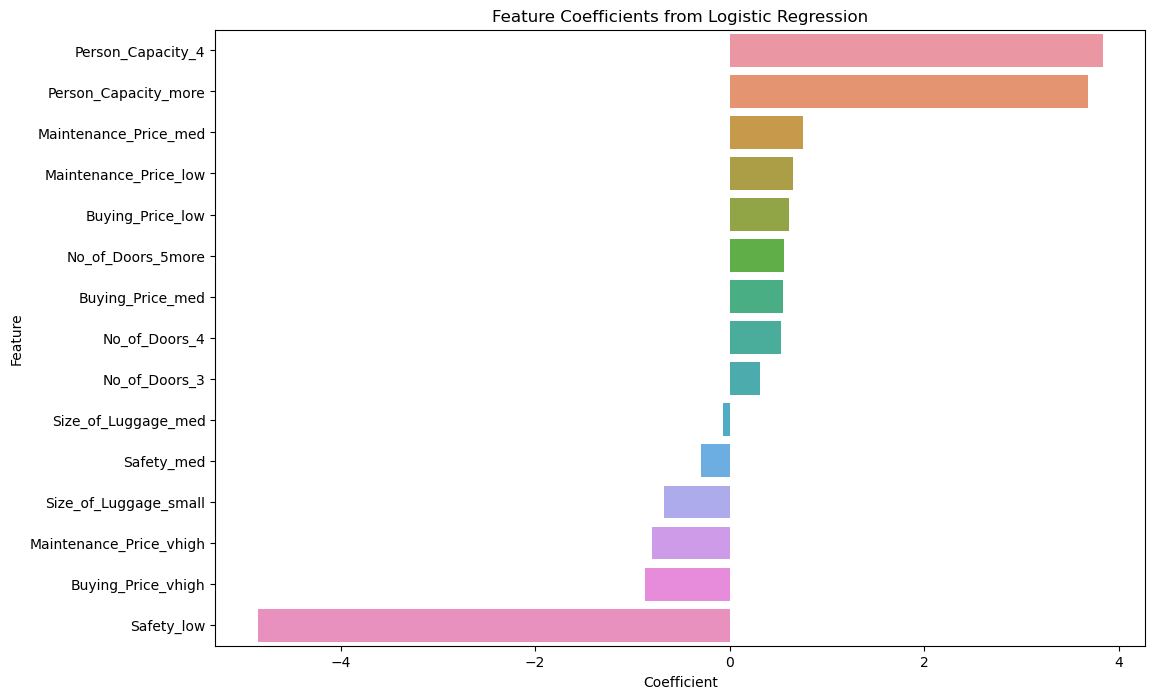

In [97]:
# Coefficients and feature names
coefficients = log_reg.coef_[0]
features = X.columns

# Create a DataFrame for better visualization
coeff_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False)

# Plot Coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df)
plt.title('Feature Coefficients from Logistic Regression')
plt.show()

- Coefficients: Show the weight of each feature in the model, indicating feature importance.
- Bar Plot: Visualizes the impact of each feature on the model’s predictions.

## Hyperparameter Tuning with Grid Search

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid with compatible solvers
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'solver': ['saga', 'newton-cg'],  # Solvers that support multinomial
    'multi_class': ['multinomial']  # Multi-class strategy
}

# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000)  # Increased max_iter for better convergence

# Initialize GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-validation Score:", best_score)

# Best model
best_rf_model = grid_search.best_estimator_

# Validate the best model on test data
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred_best = best_rf_model.predict(X_test)
print("Confusion Matrix (Best Model):\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report (Best Model):\n", classification_report(y_test, y_pred_best))
print("\nAccuracy Score (Best Model):", accuracy_score(y_test, y_pred_best))

C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best Parameters: {'C': 100, 'multi_class': 'multinomial', 'solver': 'saga'}
Best Cross-validation Score: 0.9396042659716745
Confusion Matrix (Best Model):
 [[123  11   3]
 [ 10 348   0]
 [  3   0  21]]

Classification Report (Best Model):
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       137
           1       0.97      0.97      0.97       358
           2       0.88      0.88      0.88        24

    accuracy                           0.95       519
   macro avg       0.92      0.91      0.92       519
weighted avg       0.95      0.95      0.95       519


Accuracy Score (Best Model): 0.9479768786127167


- Define the Parameter Grid: Specify a range of values for hyperparameters like C (regularization strength) and solver.
- Initialize GridSearchCV: This performs an exhaustive search over the parameter grid using cross-validation.
- Fit GridSearchCV: Train the model for each combination of parameters and evaluate its performance.
- Retrieve Best Parameters: Identify the hyperparameters that yield the highest cross-validation score.

## Cross-Validation

In [99]:
from sklearn.model_selection import cross_val_score

# Initialize Logistic Regression with the best parameters
optimized_log_reg = LogisticRegression(C=best_params['C'], solver=best_params['solver'], max_iter=1000, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(optimized_log_reg, X_train, y_train, cv=5, scoring='accuracy')

print(f'Cross-validation Scores: {cv_scores}')
print(f'Mean Cross-validation Score: {cv_scores.mean():.4f}')


Cross-validation Scores: [0.95454545 0.93801653 0.94214876 0.94214876 0.92116183]
Mean Cross-validation Score: 0.9396


- Initialize the Optimized Model: Use the best hyperparameters obtained from Grid Search.
- Perform Cross-Validation: Evaluate the model’s performance on different subsets of the training data.
- Compute Mean Score: Average the scores from each fold to get a reliable measure of model performance.

# Summary

- After applying logistic regression to the Car Acceptability Classification dataset, we optimized the model using hyperparameter tuning with the saga solver, achieving the best parameters as {'C': 100, 'multi_class': 'multinomial', 'solver': 'saga'}. The model attained a cross-validation score of approximately 0.94 and demonstrated high accuracy, with an overall accuracy of 95% on the test set. The confusion matrix showed effective classification with minimal misclassifications.
- Key features influencing acceptability included Person_Capacity_4, Person_Capacity_more, and Maintenance_Price_med, highlighting their importance in model performance.